## Model misspecification in Bayesian Experimental Design

### Case study: Mössbauer Spectroscopy - Selecting a finite number of velocities ($d_1, _2 , . . . , d_{n_d}$) for high precision measurement of the isomeric shift $\delta$

- Testing implementation of the following paper:
    - [Optimal Bayesian Experimental Design in the Presence of Model Error](https://drive.google.com/file/d/19CqIaQLwhvmL-TZIL7DzOQCStc0EXePV/view?usp=sharing)

The number of detector counts $y_i$ at velocity $d_i$ is described by the following nonlinear model: 
<br>
![True model](true_model.png "True model")
<br>

Here, $h_0$ is the gain of the detector, $h$ is the height of the absorption peak, $\gamma$ is a parameter specifying the width, and $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$ characterizes the observation error. <br>

Clearly, $\delta$ is our parameter of interest, and the remaining variables $\gamma, h, h_0$ are nuisance parameters. To keep our notation consistent with our framework for Bayesian optimal experimental design, let $\theta = (\delta)$ and $ \boldsymbol{\nu} = (\log \gamma, \log h, \log h_0)$.

Following priors are assigned to model parameters: 
<br>
![Parameter priors](priors.png "Parameter priors")
<br>

Here, $\gamma$ and $h$ are assigned to log-normal priors since the height and the width of absorption peak should be non-negative.

Substituting $\theta$ and $\mu$ into the true model, we obtain:
<br>
![Updated model](updated_model.png "Updated model")

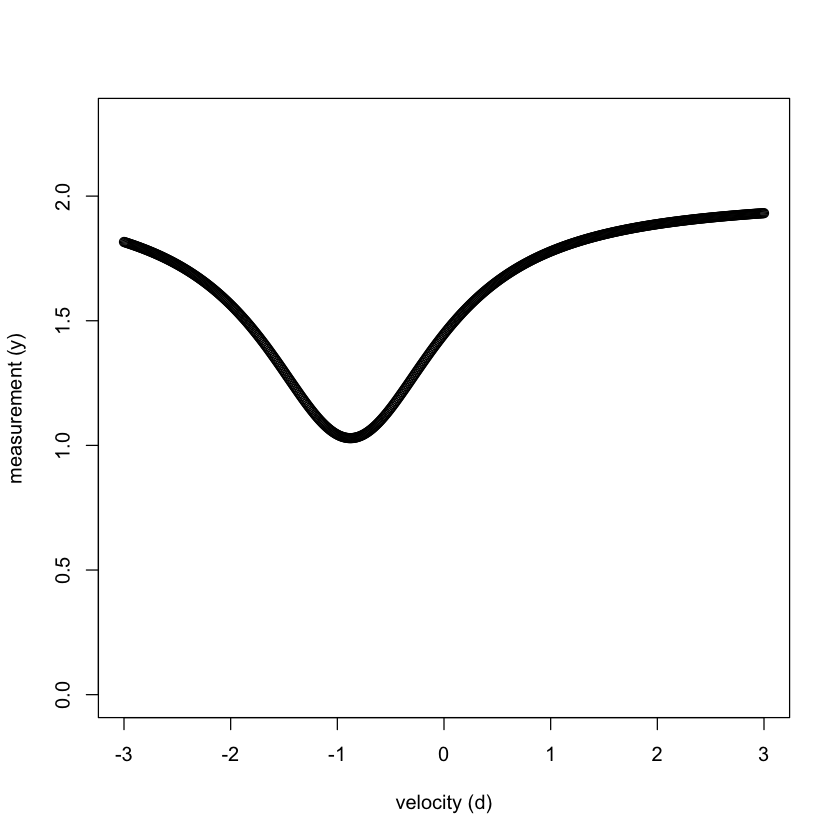

In [46]:
theta <- rnorm(n = 1, mean = 0, sd = 1)
n1 <- rnorm(n= 1, mean = 0, sd = (0.1)^2)
n2 <- rnorm(n= 1, mean = 0, sd = (0.2)^2)
n3 <- rnorm(n= 1, mean = 2, sd = (0.1)^2)
epsilon <- rnorm(n= 1, mean = 0, sd = (0.05)^2)

y <- c()
d <- c()

for (ith in -300:300){
    i = ith/100
    yi = n3 - ((exp(2*n1+n2))/((theta - i)^2+exp(2*n1))) + epsilon
    d <- c(d, i)
    y <- c(y, yi)
}

plot(x = d, y = y, xlab = "velocity (d)", ylab = "measurement (y)", xlim = c(-3, 3), ylim = c(0, 2.3))

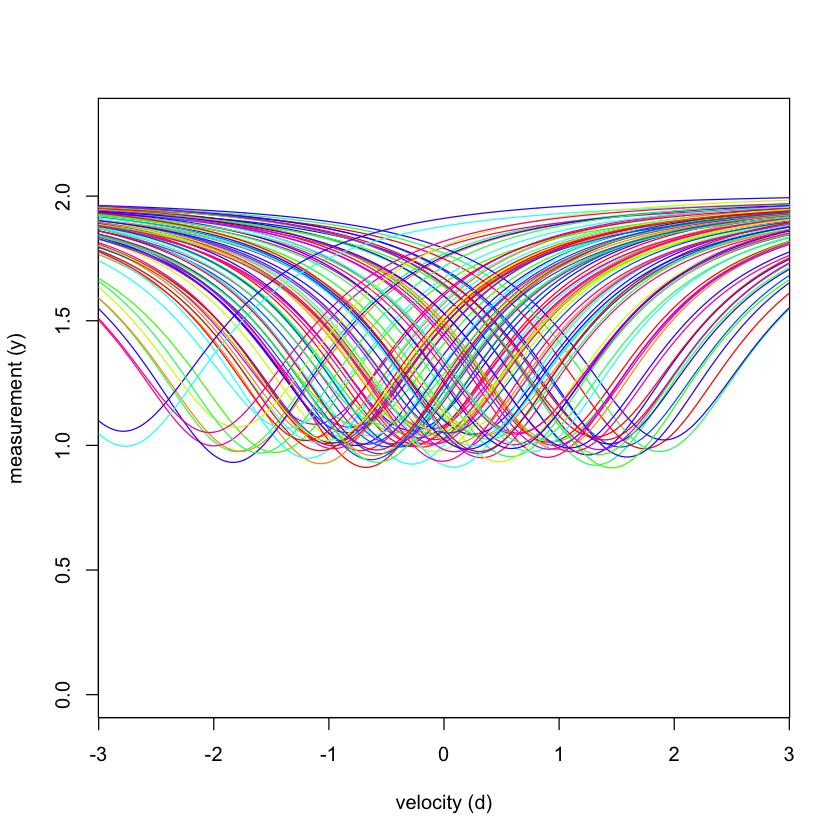

In [47]:
y <- c()
d <- c()

plot(x = d, y = y, xlab = "velocity (d)", ylab = "measurement (y)", xlim = c(-2.78, 2.78), ylim = c(0, 2.3))
for (j in 0:100) {
    theta <- rnorm(n = 1, mean = 0, sd = 1)
    n1 <- rnorm(n= 1, mean = 0, sd = (0.1)^2)
    n2 <- rnorm(n= 1, mean = 0, sd = (0.2)^2)
    n3 <- rnorm(n= 1, mean = 2, sd = (0.1)^2)
    epsilon <- rnorm(n= 1, mean = 0, sd = (0.05)^2)

    y <- c()
    d <- c()

    for (ith in -300:300){
        i = ith/100
        yi = n3 - ((exp(2*n1+n2))/((theta - i)^2+exp(2*n1))) + epsilon
        d <- c(d, i)
        y <- c(y, yi)
    }
    lines(d, y, col=sample(rainbow(10)))

}

Comparing our simulation with the simulation in the paper which is show below, we can say that they look similiar although ours don't have the peaks towards the lower measurement (y) values.
<br>
![Paper's simulation](essay_simulation.png "Paper's simulation")

Here, the model discrepancy term $\delta(d)$ can be represented as zero-mean Gaussian process. 
<br>
![Model discrepancy term](model_discrepancy_term.png "Model discrepancy term")
<br>
<br>
It will have the squared exponential correlation function.
<br>
![Exponential correlation function](exponential_correlation_func.png "Exponential correlation function")